In [21]:
import numpy as np
import grpc
import sys
import matplotlib.pyplot as plt
import time
import pandas as pd 
import numpy as np 

sys.path.append("usr/app/grpc_compiled")

import market_data_proto_pb2
import market_data_proto_pb2_grpc

import config



In [22]:
### input Params
host = config.grpc_config["host"]
port = config.grpc_config["port"]
url =  (host+":"+port)
print (url)
channel = grpc.insecure_channel(url)

stub = market_data_proto_pb2_grpc.MarketDataServiceStub(channel)


exchange = "BINANCE"
symbol = "BTCUSDT"
duration = "15m"

end_time = int(time.time()*1000)
start_time = end_time -  60*15*45*1000 ;

request  = market_data_proto_pb2.request()
request.exchange  = exchange
request.symbol = symbol
request.duration = duration
request.start_time = start_time
request.end_time = end_time


result = stub.GetKlineData(request )
print (result)

127.0.0.1:9001
is_success: true
payload {
  open: "30186.93000000"
  high: "30269.68000000"
  low: "30156.50000000"
  close: "30213.88000000"
  start_time: "1654830900000"
  volume: "532.68986000"
}
payload {
  open: "30213.89000000"
  high: "30231.94000000"
  low: "30161.15000000"
  close: "30169.30000000"
  start_time: "1654831800000"
  volume: "284.62984000"
}
payload {
  open: "30169.29000000"
  high: "30180.53000000"
  low: "30080.00000000"
  close: "30114.38000000"
  start_time: "1654832700000"
  volume: "243.42128000"
}
payload {
  open: "30114.38000000"
  high: "30147.20000000"
  low: "30042.13000000"
  close: "30083.77000000"
  start_time: "1654833600000"
  volume: "383.31286000"
}
payload {
  open: "30083.76000000"
  high: "30122.14000000"
  low: "30051.09000000"
  close: "30071.91000000"
  start_time: "1654834500000"
  volume: "186.02090000"
}
payload {
  open: "30071.91000000"
  high: "30110.85000000"
  low: "30062.74000000"
  close: "30076.40000000"
  start_time: "16548354

In [18]:
print (type(result.payload))
l = []
for r in result.payload:
    l1 = [r.open , r.high , r.low, r.close , r.start_time , r.volume]
    l.append(l1)
print(len(l))

df =df = pd.DataFrame(l, columns = ['open', 'high', 'low' , 'close' , 'start_time', 'volume'])


<class 'google.protobuf.internal.containers.RepeatedCompositeFieldContainer'>
45


In [19]:
df["open" ]  =  pd.to_numeric(df["open" ], downcast="float")
df["close" ]  =  pd.to_numeric(df["close" ], downcast="float")
df["start_time" ]  =  pd.to_numeric(df["start_time" ], downcast="float")

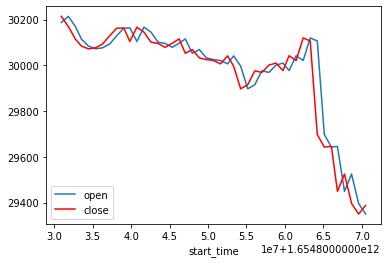

<Figure size 432x288 with 0 Axes>

In [20]:
ax = plt.gca()
df.plot(kind='line',y='open',x='start_time',ax=ax)
df.plot(kind='line',y='close',x='start_time', color='red', ax=ax)
plt.show()
name = "plot_"+ str(int(time.time()))
plt.savefig(name)

In [ ]:
print("plot save complete")
time.sleep(30*60)